In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np


file = rasterio.open('../../Topography/country_topography/data/30N000E_20101117_gmted_mea075.tif')
dataset = file.read()
print(dataset.shape)
print(np.amax(dataset))
print(np.amin(dataset))

(1, 9600, 14400)
4712
-81


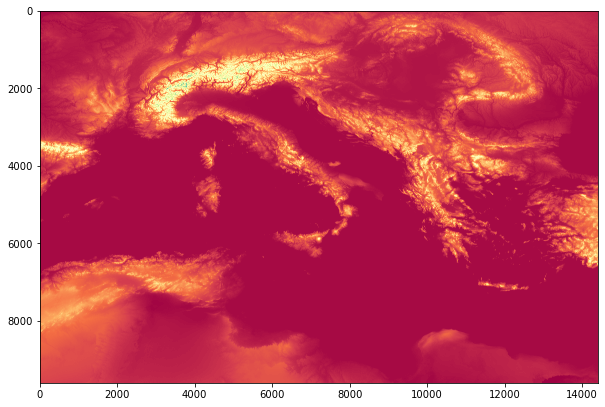

In [2]:
plt.figure(figsize=(10,10))
plt.imshow(dataset[0], cmap='Spectral')
plt.savefig("outputs/article_image_1.png", dpi=600, bbox_inches='tight')
plt.show()

In [1]:
import geopandas as gpd

df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
print(df.ADMIN.unique().tolist())

['Indonesia', 'Malaysia', 'Chile', 'Bolivia', 'Peru', 'Argentina', 'Dhekelia Sovereign Base Area', 'Cyprus', 'India', 'China', 'Israel', 'Palestine', 'Lebanon', 'Ethiopia', 'South Sudan', 'Somalia', 'Kenya', 'Pakistan', 'Malawi', 'United Republic of Tanzania', 'Syria', 'Somaliland', 'France', 'Suriname', 'Guyana', 'South Korea', 'North Korea', 'Morocco', 'Western Sahara', 'Costa Rica', 'Nicaragua', 'Republic of the Congo', 'Democratic Republic of the Congo', 'Bhutan', 'Ukraine', 'Belarus', 'Namibia', 'South Africa', 'Saint Martin', 'Sint Maarten', 'Oman', 'Uzbekistan', 'Kazakhstan', 'Tajikistan', 'Lithuania', 'Brazil', 'Uruguay', 'Mongolia', 'Russia', 'Czechia', 'Germany', 'Estonia', 'Latvia', 'Norway', 'Sweden', 'Finland', 'Vietnam', 'Cambodia', 'Luxembourg', 'United Arab Emirates', 'Belgium', 'Georgia', 'Macedonia', 'Albania', 'Azerbaijan', 'Kosovo', 'Turkey', 'Spain', 'Laos', 'Kyrgyzstan', 'Armenia', 'Denmark', 'Libya', 'Tunisia', 'Romania', 'Hungary', 'Slovakia', 'Poland', 'Ireland

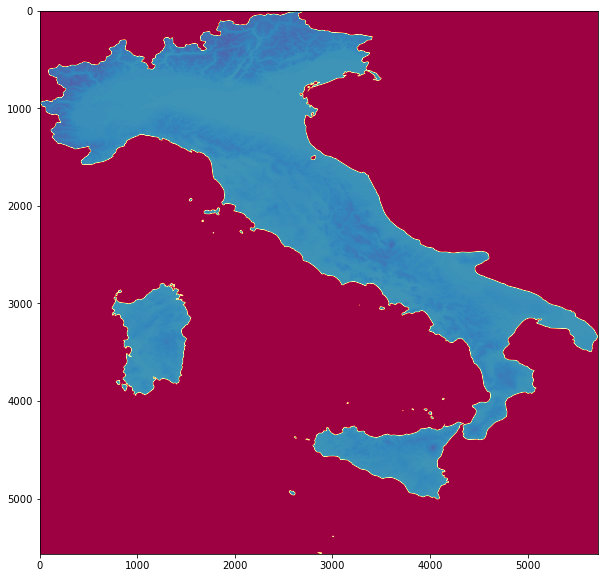

In [3]:
from shapely.geometry import mapping
from rasterio import mask as msk 

df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')

italy = df.loc[df['ADMIN'] == 'Italy']

clipped_array, clipped_transform = msk.mask(file, [mapping(italy.iloc[0].geometry)], crop=True)

plt.figure(figsize=(10,10))
plt.imshow(clipped_array[0], cmap='Spectral')
plt.savefig("outputs/article_image_2.png", dpi=600, bbox_inches='tight')
plt.show()

In [4]:
import numpy as np

def clip_raster(gdf, img):
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], 
                                                          crop=True, nodata=(np.amax(clipped_array[0]) + 1))
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

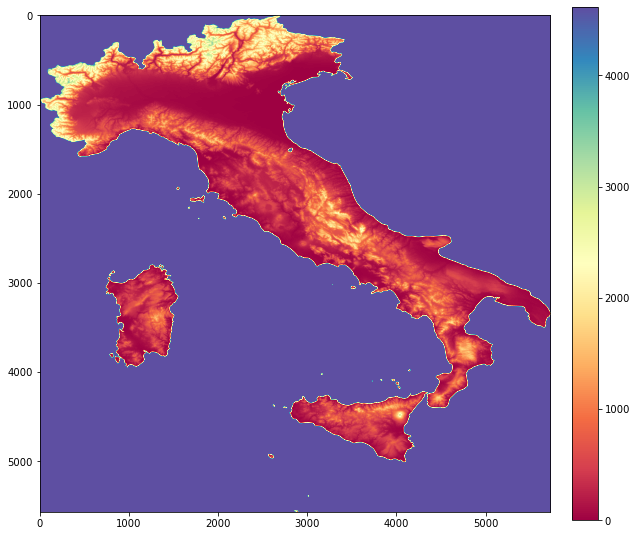

In [5]:
italy_topography, value_range = clip_raster(italy, file)

plt.figure(figsize=(10,10))
c = plt.imshow(italy_topography[0], cmap='Spectral')
plt.colorbar(c, fraction=0.046, pad=0.04)
plt.savefig("outputs/article_image_3.png", dpi=600, bbox_inches='tight')
plt.show()

In [6]:
from matplotlib.colors import LinearSegmentedColormap
italy_colormap = LinearSegmentedColormap.from_list('italy', ['#008C45', '#0b914c', '#F4F5F0', '#cf2a32', '#CD212A'], N=value_range)
italy_colormap = LinearSegmentedColormap.from_list('italy', ['#008C45', '#0b914c', '#F4F5F0', '#CD212A'], N=value_range)

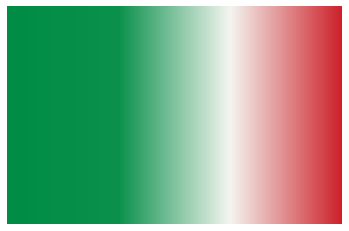

In [7]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=italy_colormap)
plt.axis('off')
plt.savefig("outputs/article_image_4.png", dpi=600, bbox_inches='tight')
plt.show()

In [8]:
from matplotlib.colors import ListedColormap

background_color = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = italy_colormap(np.linspace(0, 1, value_range))
newcolors = np.vstack((newcolors, background_color))
italy_colormap = ListedColormap(newcolors)

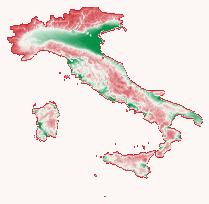

In [9]:
from matplotlib import colors

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
ax = plt.axes()
plt.imshow(italy_topography[0], cmap=italy_colormap, norm=colors.LogNorm())
ax.axis('off')
plt.savefig("outputs/article_image_5.png", dpi=600, bbox_inches='tight')

plt.show()

In [10]:
import earthpy.spatial as es

hillshade = es.hillshade(italy_topography[0], azimuth=240, altitude=1)


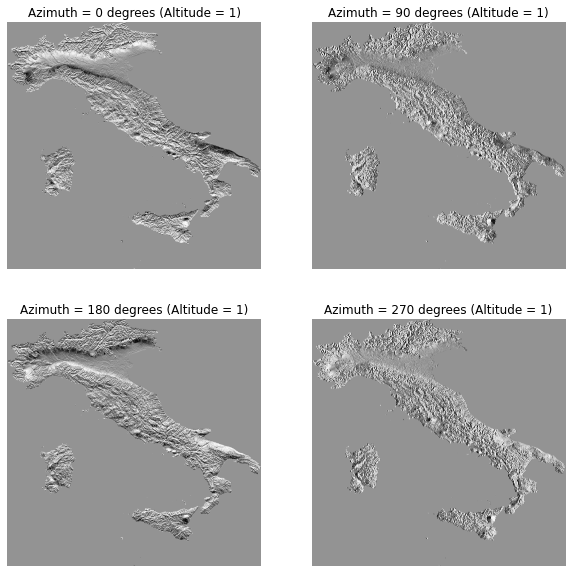

In [11]:

fig = plt.figure(figsize=(10, 10))
hillshade = es.hillshade(italy_topography[0], azimuth=0, altitude=1)
ax1 = plt.subplot(2,2,1)
ax1.imshow(hillshade, cmap="Greys")
ax1.axis('off')
ax1.set_title("Azimuth = 0 degrees (Altitude = 1)")

hillshade = es.hillshade(italy_topography[0], azimuth=90, altitude=1)
ax2 = plt.subplot(2,2,2)
ax2.imshow(hillshade, cmap="Greys")
ax2.axis('off')
ax2.set_title("Azimuth = 90 degrees (Altitude = 1)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)
ax3 = plt.subplot(2,2,3)
ax3.imshow(hillshade, cmap="Greys")
ax3.axis('off')
ax3.set_title("Azimuth = 180 degrees (Altitude = 1)")

hillshade = es.hillshade(italy_topography[0], azimuth=270, altitude=1)
ax4 = plt.subplot(2,2,4)
ax4.imshow(hillshade, cmap="Greys")
ax4.axis('off')
ax4.set_title("Azimuth = 270 degrees (Altitude = 1)")

plt.savefig("outputs/article_image_6.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:

fig = plt.figure(figsize=(10, 10))
hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)
ax1 = plt.subplot(2,2,1)
ax1.imshow(hillshade, cmap="Greys")
ax1.axis('off')
ax1.set_title("Altitude = 0 (Azimuth = 180)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=30)
ax2 = plt.subplot(2,2,2)
ax2.imshow(hillshade, cmap="Greys")
ax2.axis('off')
ax2.set_title("Altitude = 30 (Azimuth = 180)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=60)
ax3 = plt.subplot(2,2,3)
ax3.imshow(hillshade, cmap="Greys")
ax3.axis('off')
ax3.set_title("Altitude = 60 (Azimuth = 180)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=90)
ax4 = plt.subplot(2,2,4)
ax4.imshow(hillshade, cmap="Greys")
ax4.axis('off')
ax4.set_title("Altitude = 90 (Azimuth = 180)")

plt.savefig("outputs/article_image_7.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
i = plt.imshow(italy_topography[0], cmap=italy_colormap, norm=colors.LogNorm())
ax.imshow(hillshade, cmap="Greys", alpha=0.3)
ax.axis('off')

logo = plt.imread('../../Branding/globe.png')
newax = fig.add_axes([0.79, 0.78, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Italy Topography \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')


plt.savefig("outputs/italy.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
i = plt.imshow(italy_topography[0], cmap=italy_colormap, norm=colors.LogNorm())
ax.imshow(hillshade, cmap="Greys", alpha=0.3)
ax.axis('off')

ax.set_ylim(2000, 0)
ax.set_xlim(0, 4000)

plt.savefig("outputs/po_valley.png", dpi=600, bbox_inches='tight')
plt.show()